In [42]:
import numpy as np
import matplotlib.pyplot as plt

from pandas import read_csv

In [43]:
def annualized_fr(funding_rate):
    funding_periods_per_year = 365

    return np.exp(funding_rate * funding_periods_per_year) - 1

In [44]:
bitmex_index_1d = read_csv('data/Bitmex_BTCUSD_index_1d.csv', index_col='timestamp')

In [45]:
def get_basis_and_ann_fr(exchange):
    exchange_perp_1d = read_csv(f'data/btc inverse perps/{exchange}_1d.csv', index_col='timestamp')
    exchange_perp_1d = exchange_perp_1d.drop(['Open', 'High', 'Low', 'Volume', 'OI Open', 'OI High', 'OI Low', 'OI Close'], axis=1)
    close_diff_percentage = ((bitmex_index_1d['Close'] - exchange_perp_1d['Close']) / exchange_perp_1d['Close']) * 100
    return close_diff_percentage, annualized_fr(exchange_perp_1d['FR Close'])

In [46]:
basis, ann_fr  = get_basis_and_ann_fr('Kraken')

In [47]:
basis

timestamp
2020-03-30         NaN
2020-03-31         NaN
2020-04-01         NaN
2020-04-02         NaN
2020-04-03         NaN
                ...   
2023-12-30   -0.052127
2023-12-31    0.042670
2023-12-31    0.042670
2023-12-31    0.042670
2023-12-31    0.042670
Name: Close, Length: 1402, dtype: float64

In [48]:
basis.describe()

count    256.000000
mean      -0.017025
std        0.059243
min       -0.168519
25%       -0.047469
50%       -0.018254
75%        0.010815
max        0.280808
Name: Close, dtype: float64

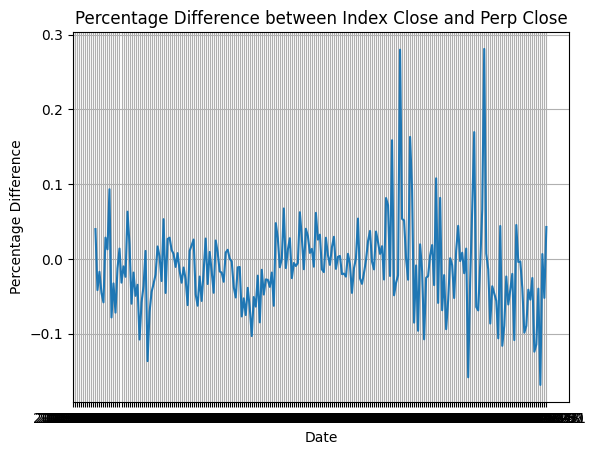

In [49]:
plt.plot(basis)
plt.title('Percentage Difference between Index Close and Perp Close')
plt.xlabel('Date')
plt.ylabel('Percentage Difference')
plt.grid(True)
plt.show()

In [50]:
ann_fr

timestamp
2023-05-20   -0.380369
2023-05-21    0.360773
2023-05-22   -0.282934
2023-05-23    1.935446
2023-05-24    1.314854
                ...   
2023-12-29    1.023051
2023-12-30    2.339220
2023-12-30    2.339220
2023-12-31    4.629494
2023-12-31    4.629494
Name: FR Close, Length: 236, dtype: float64

In [51]:
ann_fr.describe()

count    236.000000
mean       0.678522
std        1.143753
min       -0.919600
25%       -0.085208
50%        0.332797
75%        1.008121
max        6.221052
Name: FR Close, dtype: float64

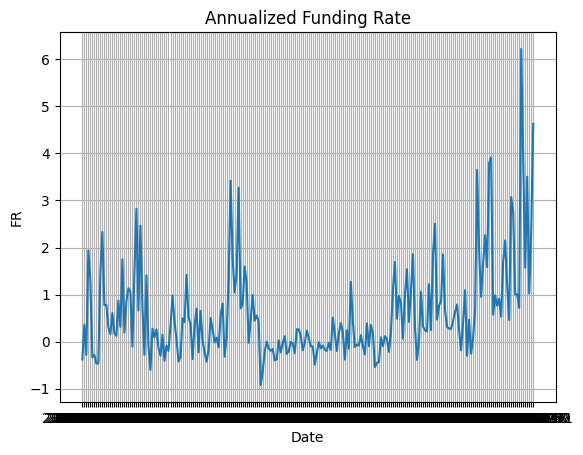

In [52]:
plt.plot(ann_fr)
plt.title('Annualized Funding Rate')
plt.xlabel('Date')
plt.ylabel('FR')
plt.grid(True)
plt.show()